**Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")


**Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_data = pd.read_csv('/content/drive/MyDrive/colab/INNHotelsGroup.csv')

In [ ]:
data = hotel_data.copy()

Data Overview

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


Understand the shape of the dataset.

In [ ]:
data.shape

(36275, 19)

Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Statistical summary of the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
cat_columns = [
    "required_car_parking_space",
    "repeated_guest",
    "type_of_meal_plan",
    "market_segment_type",
    "booking_status",
    "room_type_reserved",
]
data[cat_columns] = data[cat_columns].astype("object")

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
required_car_parking_space,36275,2,0,35151
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
repeated_guest,36275,2,0,35345
booking_status,36275,2,Not_Canceled,24390


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


# **Exploratory Data Analysis (EDA)**

---



**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

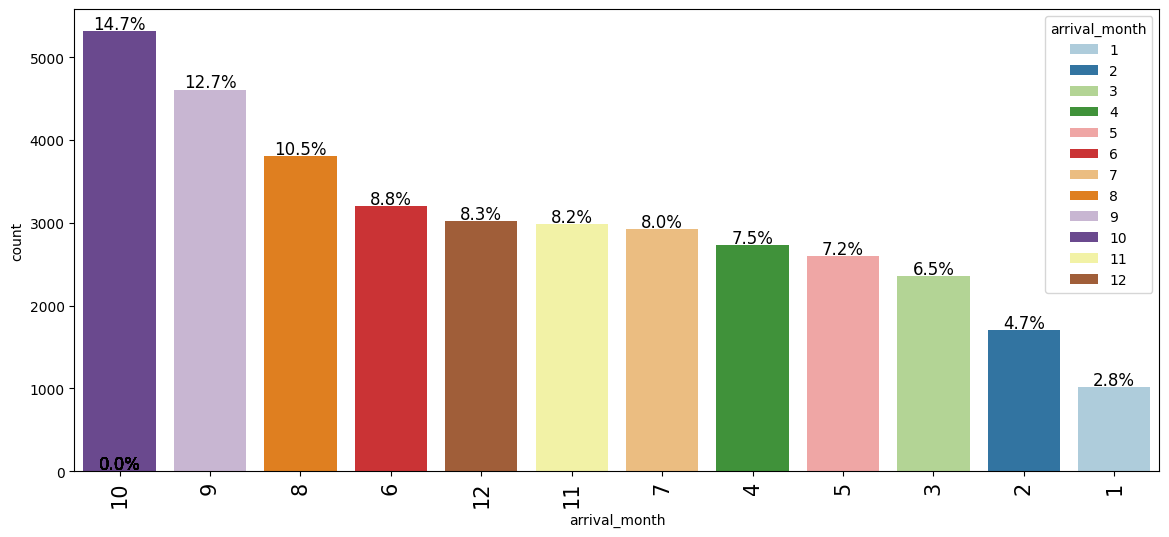

In [ ]:
labeled_barplot(data, "arrival_month", perc=True)

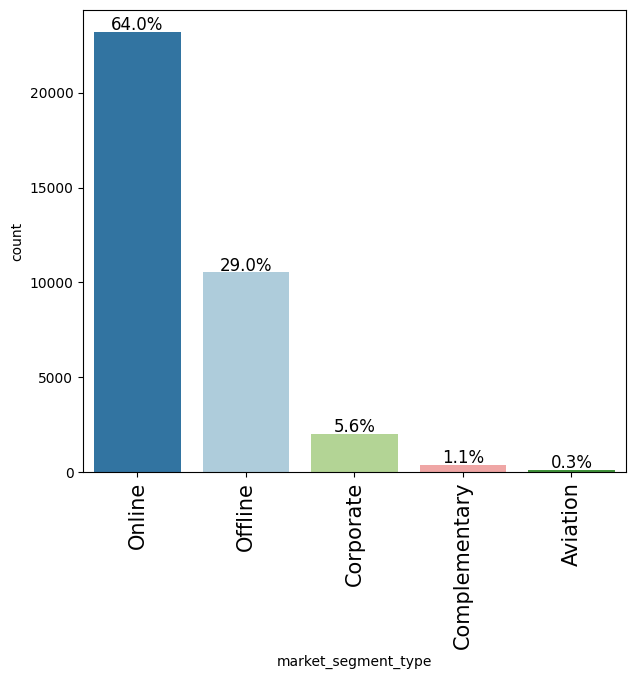

In [ ]:
labeled_barplot(data, "market_segment_type", perc = True)

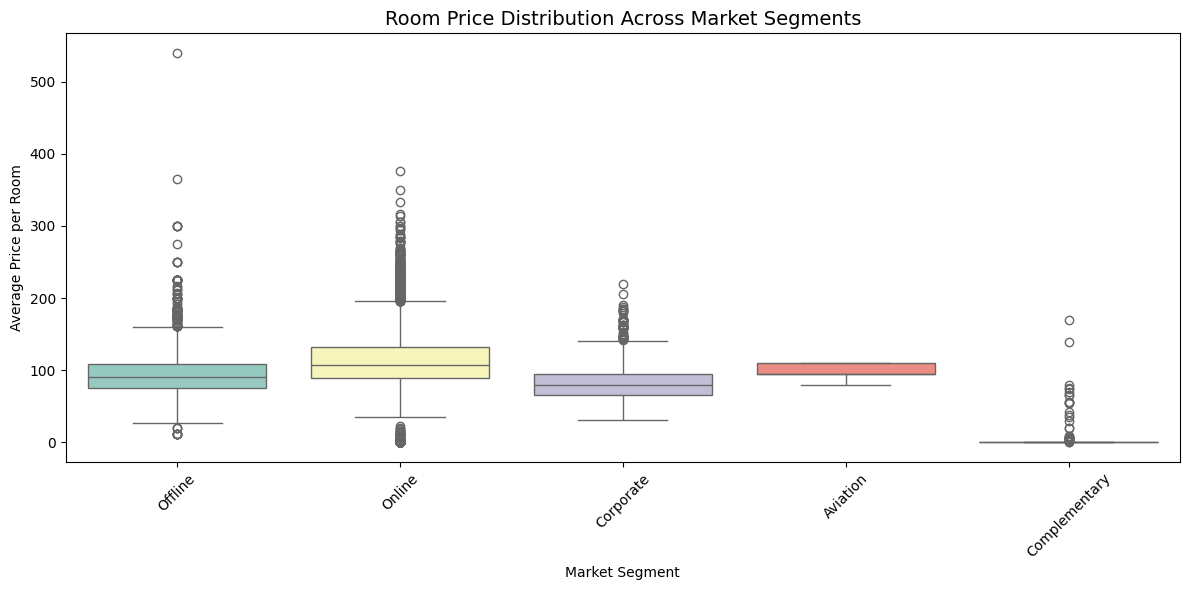

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room', palette='Set3')
plt.xticks(rotation=45)
plt.title("Room Price Distribution Across Market Segments", fontsize=14)
plt.xlabel("Market Segment")
plt.ylabel("Average Price per Room")
plt.tight_layout()
plt.show()


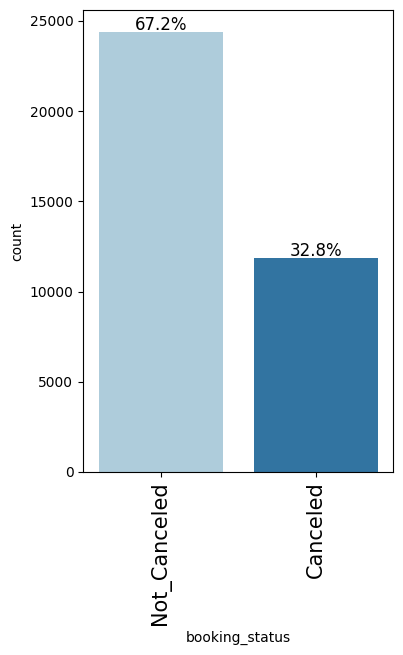

In [ ]:
labeled_barplot(data, feature='booking_status', perc=True)


In [ ]:
# Filter only repeating guests
repeating_guests = data[data['repeated_guest'] == 1]

# Create a table with counts of booking statuses
status_table = repeating_guests['booking_status'].value_counts().rename_axis('booking_status').reset_index(name='count')

# Pivot to make it more readable
status_pivot = pd.pivot_table(
    repeating_guests,
    index=[],
    columns='booking_status',
    aggfunc='size',
    fill_value=0
)

# Calculate total and cancellation percentage
canceled = status_pivot.get('Canceled', 0)
not_canceled = status_pivot.get('Not_Canceled', 0)
total = canceled + not_canceled
cancel_rate = (canceled / total) * 100

# Display output
print("📊 Booking Status for Repeating Guests:")
display(status_pivot)
print(f"\n📌 Percentage of cancellations by repeating guests: {cancel_rate:.2f}%")


📊 Booking Status for Repeating Guests:


,0
booking_status,
Canceled,16
Not_Canceled,914



📌 Percentage of cancellations by repeating guests: 1.72%


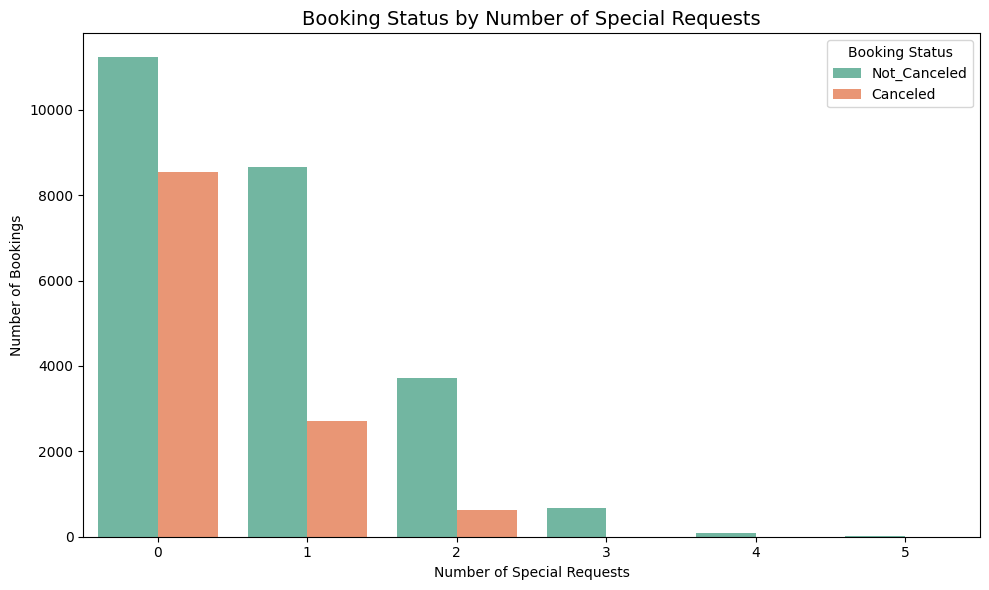

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='no_of_special_requests', hue='booking_status', palette='Set2')
plt.title("Booking Status by Number of Special Requests", fontsize=14)
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.legend(title="Booking Status")
plt.tight_layout()
plt.show()


In [ ]:
# Group by adults, children, and booking_status
grouped = data.groupby(['no_of_adults', 'no_of_children', 'booking_status']).size().reset_index(name='count')

# Pivot the table for readability
pivot_table = grouped.pivot_table(
    index=['no_of_adults', 'no_of_children'],
    columns='booking_status',
    values='count',
    fill_value=0,
    margins=True,
    margins_name='Total'
)

# Display the result
print("📊 Number of Bookings by Adults, Children, and Cancellation Status:")
display(pivot_table)


📊 Number of Bookings by Adults, Children, and Cancellation Status:


booking_status                  Canceled  Not_Canceled         Total
no_of_adults no_of_children                                         
0            1                  0.000000         1.000      1.000000
             2                 44.000000        89.000     66.500000
             3                  0.000000         5.000      5.000000
1            0               1809.000000      5742.000   3775.500000
             1                 23.000000        67.000     45.000000
             2                 24.000000        29.000     26.500000
             9                  0.000000         1.000      1.000000
2            0               8213.000000     15506.000  11859.500000
             1                511.000000       991.000    751.000000
             2                389.000000       482.000    435.500000
             3                  5.000000         9.000      7.000000
             9                  1.000000         0.000      1.000000
             10                 0.000000         1.000      1.000000
3            0                857.000000      1434.000   1145.500000
             1                  6.000000        19.000     12.500000
             2                  0.000000         1.000      1.000000
4            0                  3.000000        13.000      8.000000
Total                         990.416667      1524.375   1295.535714

In [ ]:
# Group by parking requirement and booking status
parking_cancellation = data.groupby(['required_car_parking_space', 'booking_status']).size().unstack().fillna(0)

# Add total and cancellation rate columns
parking_cancellation['Total'] = parking_cancellation.sum(axis=1)
parking_cancellation['Cancellation_Rate (%)'] = (parking_cancellation['Canceled'] / parking_cancellation['Total']) * 100

# Rename index for clarity
parking_cancellation.index = ['No Parking Requested', 'Parking Requested']

# Display the table
print("📊 Cancellation Rate Based on Car Parking Requirement:")
display(parking_cancellation[['Canceled', 'Not_Canceled', 'Total', 'Cancellation_Rate (%)']])


📊 Cancellation Rate Based on Car Parking Requirement:


booking_status,Canceled,Not_Canceled,Total,Cancellation_Rate (%)
No Parking Requested,11771,23380,35151,33.486956
Parking Requested,114,1010,1124,10.142349


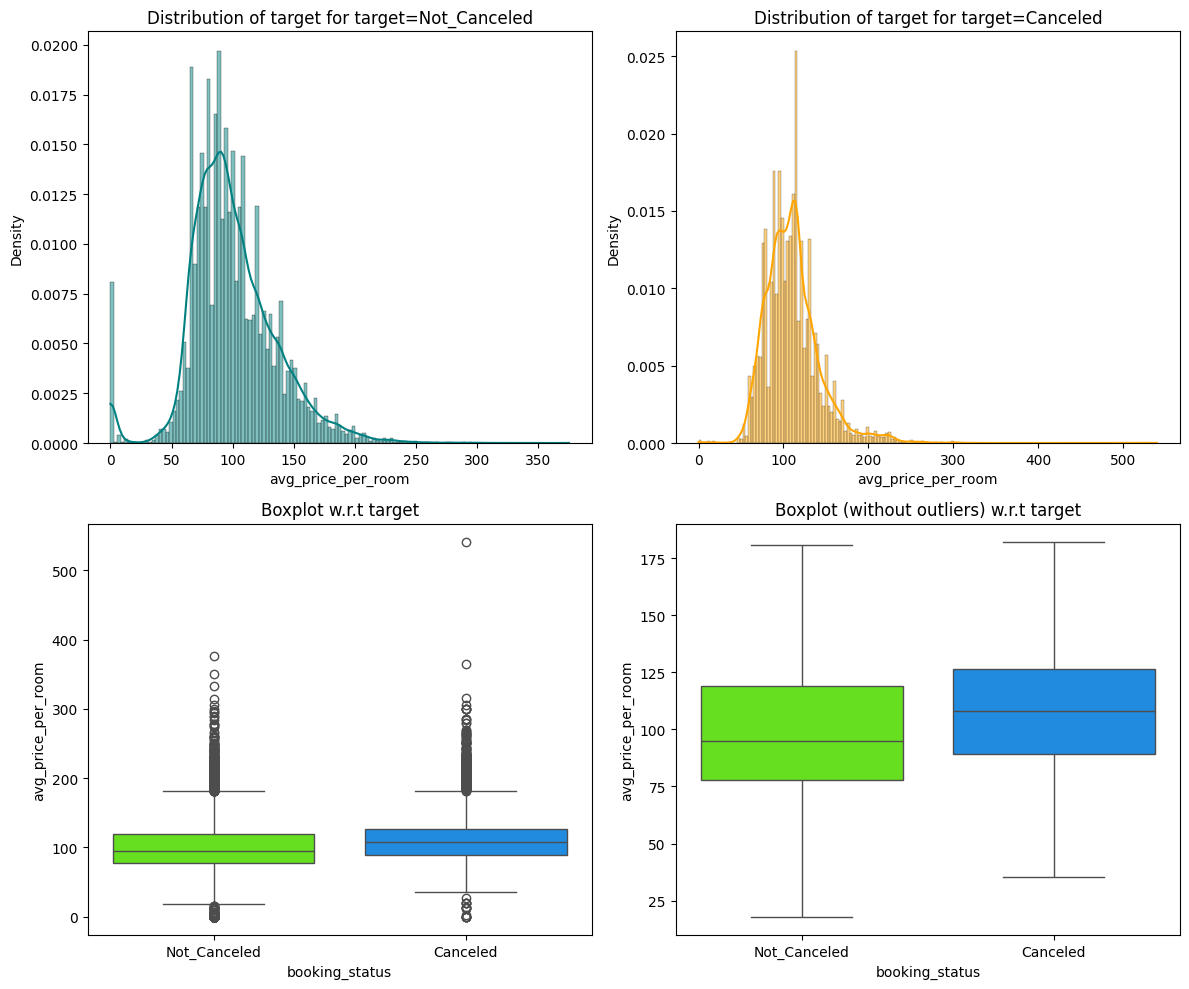

In [ ]:
# Use the custom function to plot room price vs cancellation
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')


In [ ]:
# Step 1: Create price bins using quantiles
data['price_range'] = pd.qcut(data['avg_price_per_room'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Group by price range and booking_status
price_cancel = data.groupby(['price_range', 'booking_status']).size().unstack(fill_value=0)

# Step 3: Add total and cancellation rate
price_cancel['Total'] = price_cancel.sum(axis=1)
price_cancel['Cancellation Rate (%)'] = (price_cancel['Canceled'] / price_cancel['Total']) * 100

# Display the result
print("📊 Cancellation Rate by Room Price Range:")
display(price_cancel[['Canceled', 'Not_Canceled', 'Total', 'Cancellation Rate (%)']])


📊 Cancellation Rate by Room Price Range:


booking_status,Canceled,Not_Canceled,Total,Cancellation Rate (%)
price_range,,,,
Low,2617,9547,12164,21.514305
Medium,4313,7708,12021,35.878879
High,4955,7135,12090,40.984285


**Data Preprocessing**

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_range
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,Low
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,Medium
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,Low
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,Medium
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,Medium


**Outlier Check**

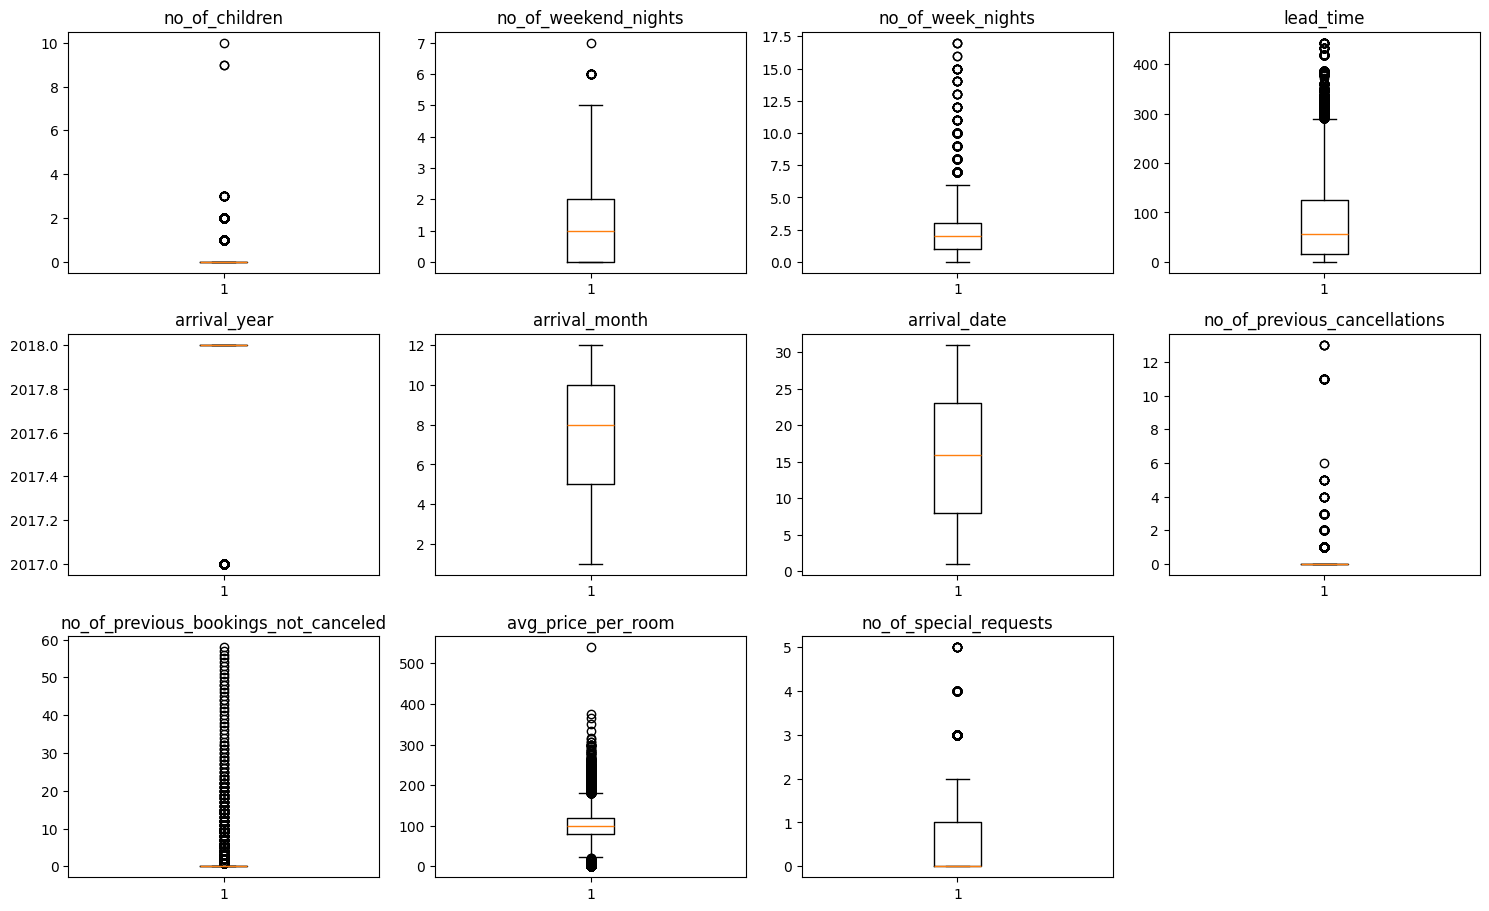

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("no_of_adults")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Data Preparation for modeling**

In [ ]:
X = data.drop(["booking_status", "Booking_ID"], axis=1) # Drop Booking_ID as it's a unique identifier
Y = data["booking_status"]
X = X.drop(["price_range"], axis=1)

# Only dummify appropriate categorical columns
X = pd.get_dummies(X, columns=["type_of_meal_plan","room_type_reserved", "market_segment_type"], drop_first=True) # Added market_segment_type here


X = X.astype(float) # This should now work as all columns are either numeric or dummies (0/1)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0
)

y_train.reset_index(inplace = True, drop = True)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
Not_Canceled    0.672692
Canceled        0.327308
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
Not_Canceled    0.671598
Canceled        0.328402
Name: proportion, dtype: float64


In [ ]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
# Step 1: Convert scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Step 2: Add constant
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)


**Model Building**

Model can make wrong predictions as:

Predicting a customer will cancel or not cancel - Loss of resources
Predicting a customer will not cancel but in reality the customer would have cancelled - Loss of opportunity
Which case is more important?

Losing a potential customer by predicting that a customer will not cancel but in reality the customer was going to cancel.
How to reduce this loss i.e need to reduce False Negatives?

hotel would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Logistic Regression (with Statsmodel)

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled, has_constant='add')
X_test_with_intercept = SM.add_constant(X_test_scaled, has_constant='add')

In [ ]:
X_test_with_intercept = X_test_with_intercept.reindex(columns=X_train_with_intercept.columns, fill_value=0)


In [ ]:
X_train_with_intercept.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.305009,-0.260385,1.370793,-0.852818,-0.176248,0.044917,0.471234,-1.116495,-0.759786,-0.166882,-0.06623,-0.092282,-0.678263,0.490168,-0.319804,-0.014034,2.464342,-0.139397,-0.014034,-0.445501,-0.088651,-0.165757,-0.068329,-0.105212,-0.243566,-0.643218,0.754935
1,1.0,0.305009,-0.260385,-0.928380,-0.139529,-0.176248,2.594228,0.471234,1.161819,1.073589,-0.166882,-0.06623,-0.092282,-1.465036,-0.783116,-0.319804,-0.014034,-0.405788,-0.139397,-0.014034,-0.445501,-0.088651,-0.165757,-0.068329,-0.105212,-0.243566,1.554682,-1.324617
2,1.0,-1.632154,-0.260385,1.370793,-0.852818,-0.176248,-0.758291,0.471234,-1.441968,-1.103544,-0.166882,-0.06623,-0.092282,-0.520909,-0.783116,-0.319804,-0.014034,-0.405788,-0.139397,-0.014034,-0.445501,-0.088651,-0.165757,-0.068329,-0.105212,-0.243566,-0.643218,0.754935
3,1.0,0.305009,-0.260385,-0.928380,2.000341,-0.176248,1.686254,0.471234,0.510872,-1.103544,-0.166882,-0.06623,-0.092282,0.966807,0.490168,-0.319804,-0.014034,-0.405788,-0.139397,-0.014034,-0.445501,-0.088651,-0.165757,-0.068329,-0.105212,-0.243566,1.554682,-1.324617
4,1.0,0.305009,-0.260385,1.370793,-0.139529,-0.176248,-0.059849,0.471234,0.510872,1.073589,-0.166882,-0.06623,-0.092282,0.935336,-0.783116,-0.319804,-0.014034,-0.405788,-0.139397,-0.014034,-0.445501,-0.088651,-0.165757,-0.068329,-0.105212,-0.243566,-0.643218,0.754935


In [ ]:
# Convert the target variable to numerical (0 and 1)
y_train = y_train.map({'Not_Canceled': 0, 'Canceled': 1})
y_test = y_test.map({'Not_Canceled': 0, 'Canceled': 1})

# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

X_train_with_intercept.head()

LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.422782
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3313
Time:                        08:24:45   Log-Likelihood:                -10735.
converged:                      False   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.6597   2789.266     -0.001      1.000   -5468.520

Checking Logistic Regression model performance on training set

In [ ]:
y_pred = LogisticReg.predict(X_train_with_intercept)
y_pred.head()

,0
0,0.299332
1,0.748617
2,0.351662
3,0.528422
4,0.771076


In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.805135,0.629046,0.737065,0.678785


         Current function value: 0.422782
         Iterations: 35


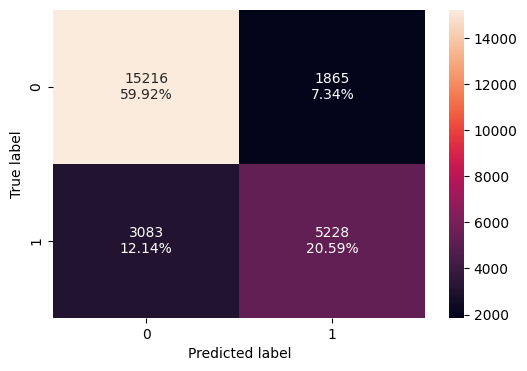

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [ ]:
# Step 3: Align test columns with train (safest way)
X_test_with_intercept = X_test_with_intercept.reindex(columns=X_train_with_intercept.columns, fill_value=0)


In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()

logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

         Current function value: 0.422782
         Iterations: 35


,Accuracy,Recall,Precision,F1
0,0.679316,0.920257,0.506468,0.653357


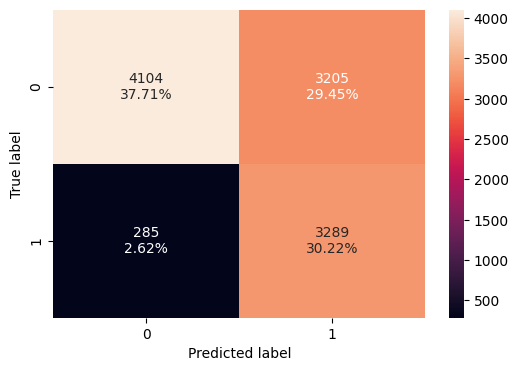

In [ ]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

Logistic Regression - Dealing with Multicollinearity

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_with_intercept)

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable        VIF
0                                  const   1.000000
1                           no_of_adults   1.339461
2                         no_of_children   2.022783
3                   no_of_weekend_nights   1.072811
4                      no_of_week_nights   1.098256
5             required_car_parking_space   1.035812
6                              lead_time   1.392764
7                           arrival_year   1.423648
8                          arrival_month   1.268978
9                           arrival_date   1.006117
10                        repeated_guest   1.825327
11          no_of_previous_cancellations   1.356982
12  no_of_previous_bookings_not_canceled   1.646921
13                    avg_price_per_room   2.027541
14                no_of_special_requests   1.257084
15         type_of_meal_plan_Meal Plan 2   1.270298
16         type_of_meal_plan_Meal Plan 3   1.024120
17        type_of_meal_plan_Not Sele

In [ ]:
# Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Dropping market_segment_type_Online due to high VIF


Dealing with high p-value variables

In [ ]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.422782
         Iterations: 35
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.9998902959493746
         Current function value: 0.422826
         Iterations: 35
Dropping column market_segment_type_Complementary with p-value: 0.9997716173928898
Optimization terminated successfully.
         Current function value: 0.423340
         Iterations 10
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.8199888590780754
Optimization terminated successfully.
         Current function value: 0.423341
         Iterations 10
Dropping column arrival_date with p-value: 0.4022468068120777
Optimization terminated successfully.
         Current function value: 0.423355
         Iterations 10
Dropping column market_segment_type_Online with p-value: 0.292409385580954
Optimization terminated successfully.
         Current function value: 0.423378
         Iterations 10
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.24819772

In [ ]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]
X_train_significant.head(10)

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
0,1.0,0.305009,-0.260385,1.370793,-0.852818,-0.176248,0.044917,0.471234,-1.116495,-0.166882,-0.06623,-0.678263,0.490168,2.464342,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
1,1.0,0.305009,-0.260385,-0.928380,-0.139529,-0.176248,2.594228,0.471234,1.161819,-0.166882,-0.06623,-1.465036,-0.783116,-0.405788,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,1.554682
2,1.0,-1.632154,-0.260385,1.370793,-0.852818,-0.176248,-0.758291,0.471234,-1.441968,-0.166882,-0.06623,-0.520909,-0.783116,-0.405788,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
3,1.0,0.305009,-0.260385,-0.928380,2.000341,-0.176248,1.686254,0.471234,0.510872,-0.166882,-0.06623,0.966807,0.490168,-0.405788,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,1.554682
4,1.0,0.305009,-0.260385,1.370793,-0.139529,-0.176248,-0.059849,0.471234,0.510872,-0.166882,-0.06623,0.935336,-0.783116,-0.405788,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
5,1.0,0.305009,-0.260385,1.370793,-0.139529,-0.176248,-0.723368,0.471234,1.487292,-0.166882,-0.06623,0.868102,0.490168,-0.405788,-0.139397,2.244666,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
6,1.0,0.305009,-0.260385,-0.928380,0.573761,-0.176248,-0.478914,0.471234,0.185399,-0.166882,-0.06623,1.553310,-0.783116,-0.405788,-0.139397,2.244666,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
7,1.0,0.305009,-0.260385,-0.928380,-0.139529,-0.176248,-0.304304,0.471234,-1.441968,-0.166882,-0.06623,-1.021582,-0.783116,2.464342,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
8,1.0,0.305009,-0.260385,0.221207,-0.139529,-0.176248,-0.024927,0.471234,-0.465548,-0.166882,-0.06623,0.592017,-0.783116,-0.405788,-0.139397,-0.445501,-0.088651,-0.165757,-0.068329,-0.243566,-0.643218
9,1.0,0.305009,-0.260385,1.370793,2.000341,-0.176248,0.079839,0.471234,-1.441968,-0.166882,-0.06623,-1.465036,-0.783116,-0.405788,-0.139397,2.244666,-0.088651,-0.165757,-0.068329,-0.243566,1.554682


**Training the Logistic Regression model again with only the significant features**

In [ ]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.423469
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 31 May 2025   Pseudo R-squ.:                  0.3302
Time:                        08:34:15   Log-Likelihood:                -10753.
converged:                       True   LL-Null:                       -16054.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1640      0.022    -53.922     

**Determining optimal threshold using ROC Curve**

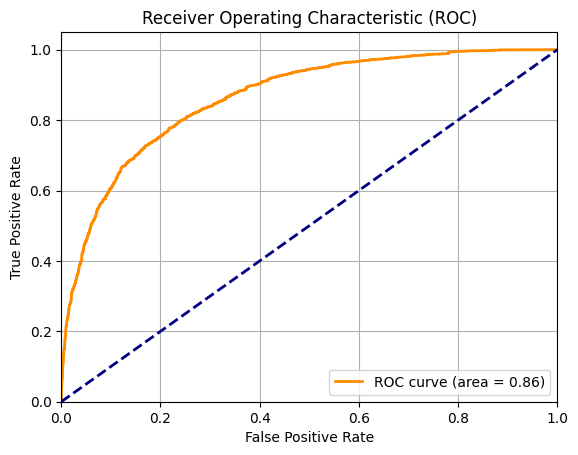

In [ ]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.321


**Checking tuned Logistic Regression model performance on training set**

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.780403,0.777163,0.634292,0.698497


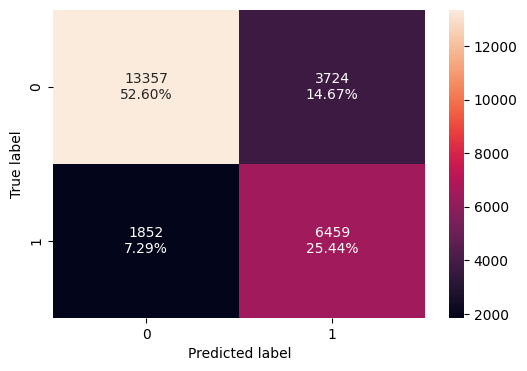

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.643297,0.940963,0.478106,0.63405


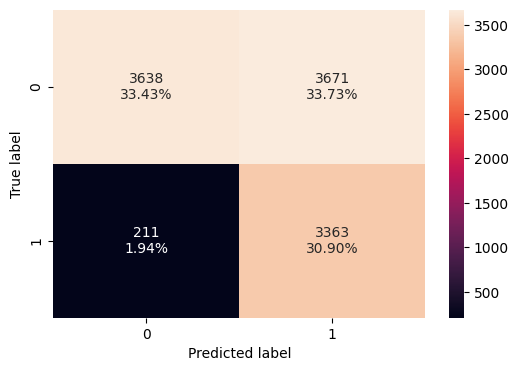

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

**Decision Tree Classifier (pre-pruning and post-pruning)**

In [ ]:
# Choose the type of classifier.
dt_model_tuned_1 = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring='recall', cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(11),
                       max_leaf_nodes=100, min_samples_split=30,
                       random_state=42)

**Checking pre-pruned Decision Tree Classifier performance on training set**

In [ ]:
dt_model_tuned_1_perf_train = model_performance_classification(
    dt_model_tuned_1, X_train, y_train
)
dt_model_tuned_1_perf_train

,Accuracy,Recall,Precision,F1
0,0.859444,0.844182,0.755221,0.797227


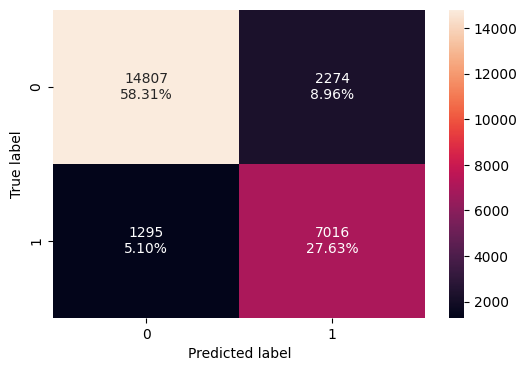

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_train, y_train)

Checking pre-pruned Decision Tree Classifier performance on test set

In [ ]:
dt_model_tuned_1_perf_test = model_performance_classification(
    dt_model_tuned_1, X_test, y_test
)
dt_model_tuned_1_perf_test

,Accuracy,Recall,Precision,F1
0,0.854452,0.831841,0.751517,0.789641


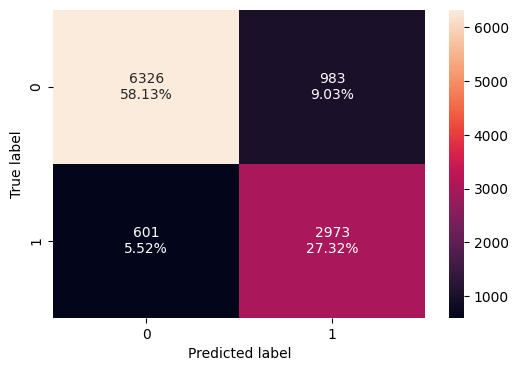

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_test, y_test)

**Visualizing the decision Tree**

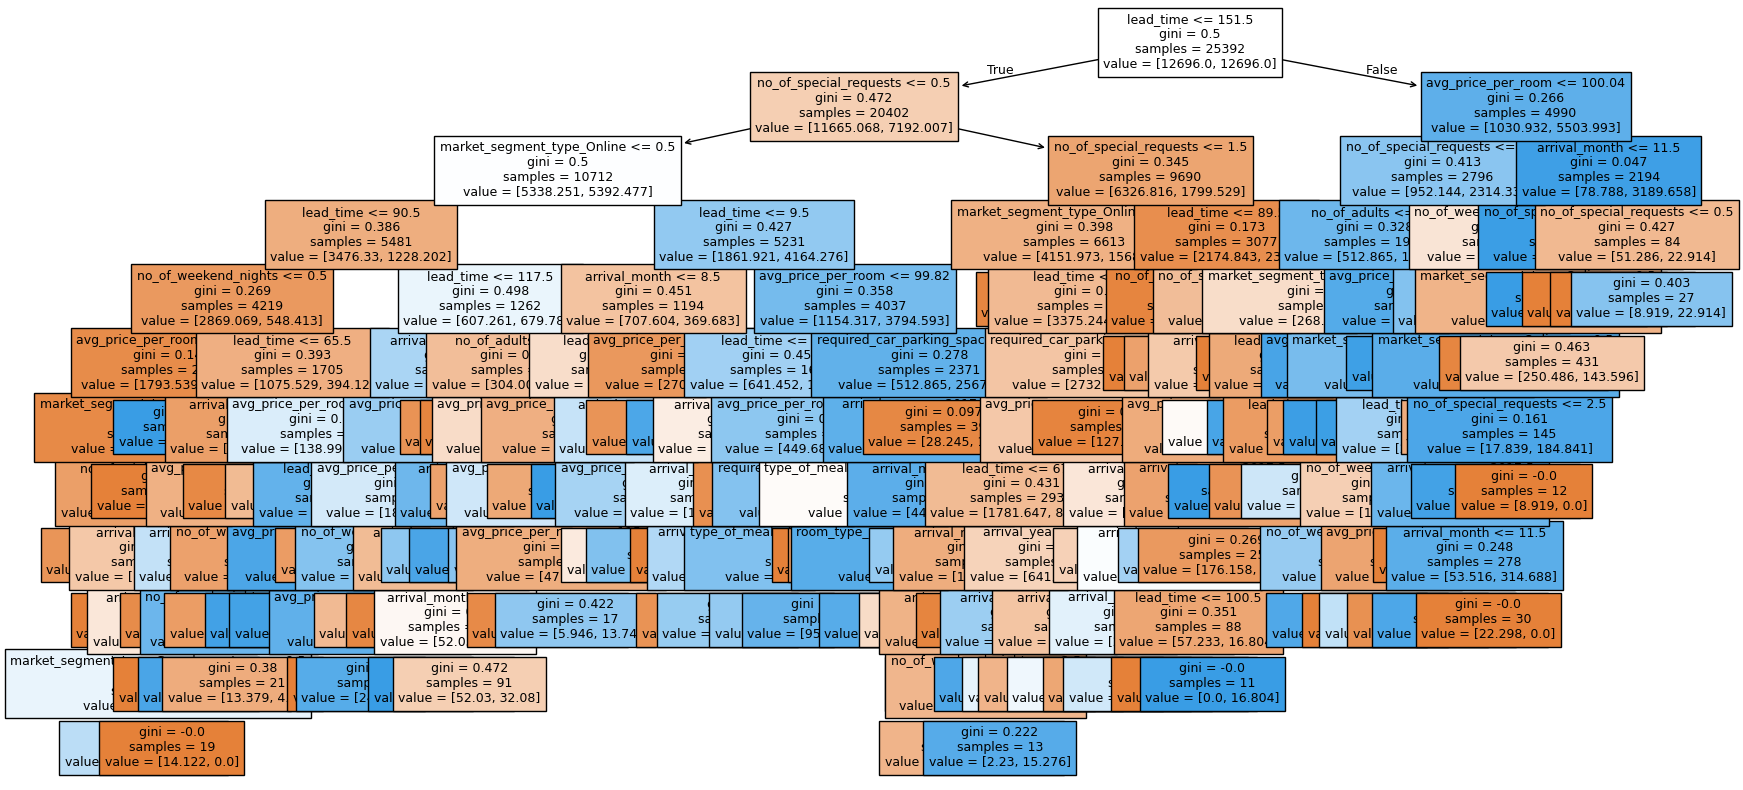

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned_1,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Analyzing Feature Importance for tuned Decision Tree Classifier**

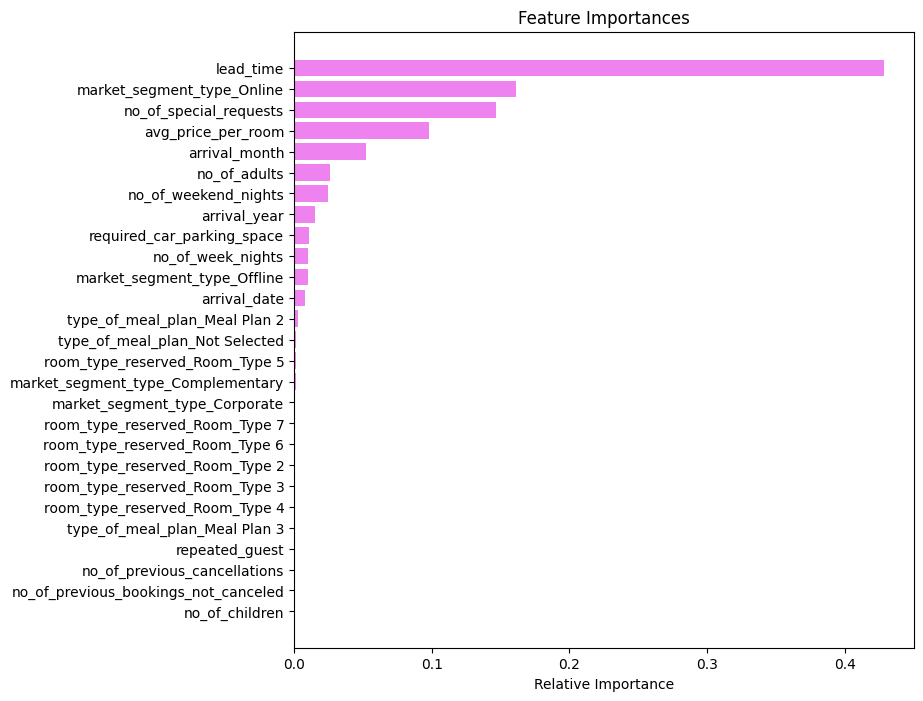

In [ ]:
# importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Post - pruning the tree**

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007113
1,1.842455e-07,0.007113
2,3.811208e-07,0.007113
3,3.952364e-07,0.007114
4,4.453017e-07,0.007114
...,...,...
1352,7.079816e-03,0.288491
1353,1.248946e-02,0.300981
1354,1.626436e-02,0.317245
1355,2.344453e-02,0.364134


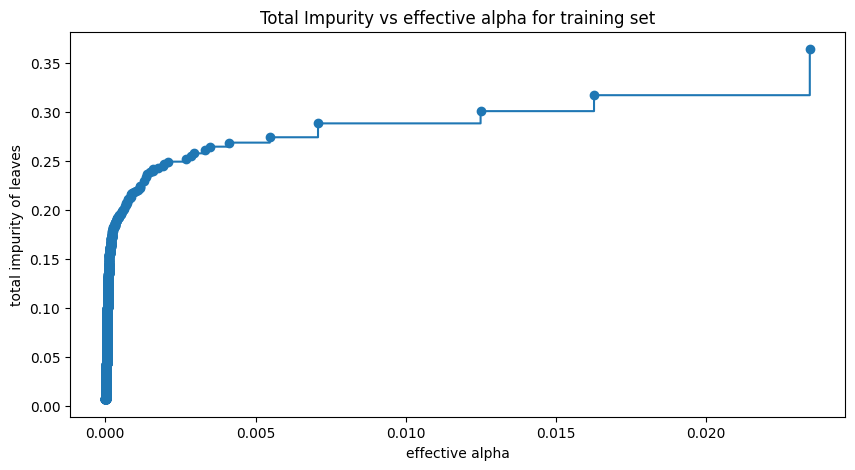

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, y_train)
    dt_models.append(dt_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dt_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0762205142164677


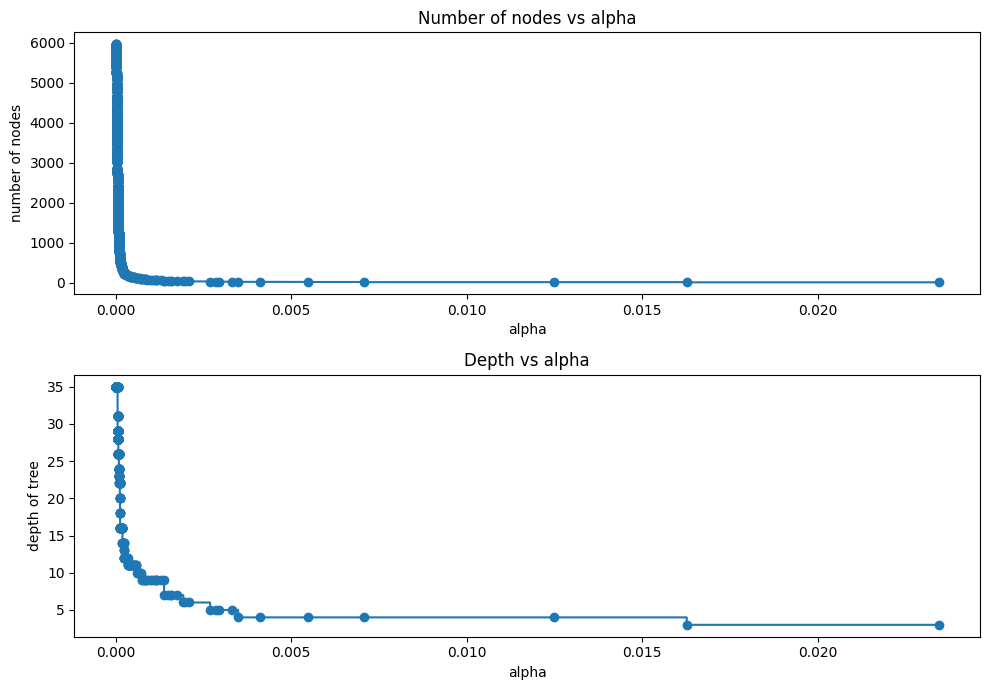

In [ ]:
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_model.tree_.node_count for dt_model in dt_models]
depth = [dt_model.tree_.max_depth for dt_model in dt_models]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and test sets**

In [ ]:
recall_train = []
for dt_mpdel in dt_models:
    pred_train = dt_model.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

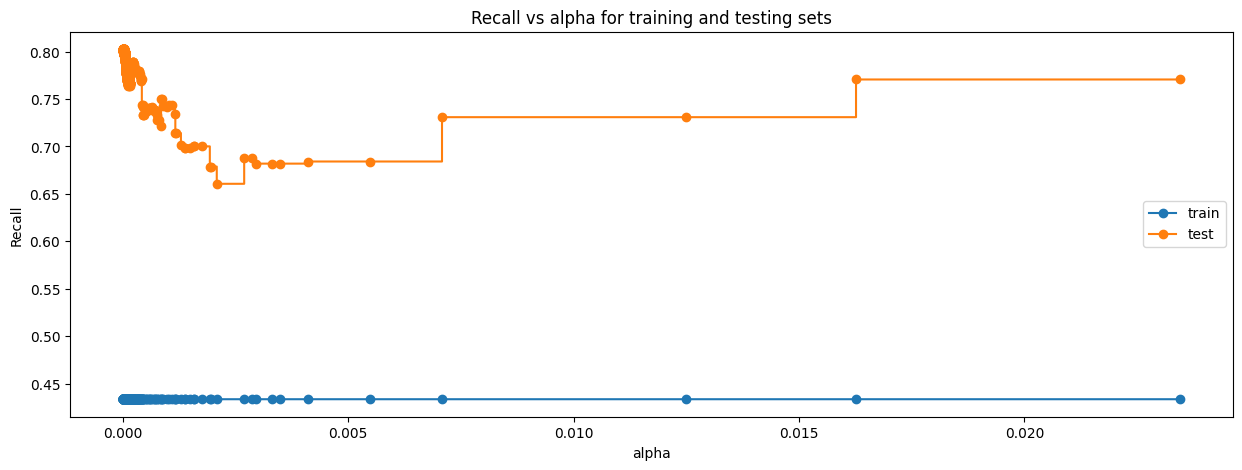

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
dt_model_post_pruned = dt_models[index_best_model]
print(dt_model_post_pruned)

DecisionTreeClassifier(ccp_alpha=np.float64(1.5315409927886298e-05),
                       random_state=1)


In [ ]:
dt_model_tuned_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.126, 1: 0.874}, random_state=1
)
dt_model_tuned_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0762205142164677),
                       class_weight={0: 0.126, 1: 0.874}, random_state=1)

In [ ]:
dt_model_tuned_2_perf_train = model_performance_classification(dt_model_tuned_2, X_train, y_train)
dt_model_tuned_2_perf_train

,Accuracy,Recall,Precision,F1
0,0.327308,1.0,0.327308,0.493191


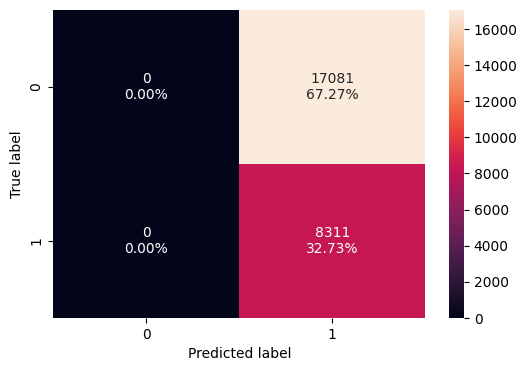

In [ ]:
plot_confusion_matrix(dt_model_tuned_2, X_train, y_train)

In [ ]:
dt_model_tuned_2_perf_test = model_performance_classification(dt_model_tuned_2, X_test, y_test)
dt_model_tuned_2_perf_test

,Accuracy,Recall,Precision,F1
0,0.328402,1.0,0.328402,0.494432


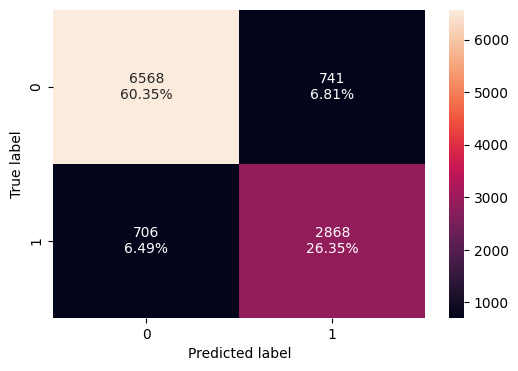

In [ ]:
plot_confusion_matrix(dt_model_post_pruned, X_test, y_test)  # Complete the code to get the confusion matrix on test data

**Visualizing the Decision Tree**

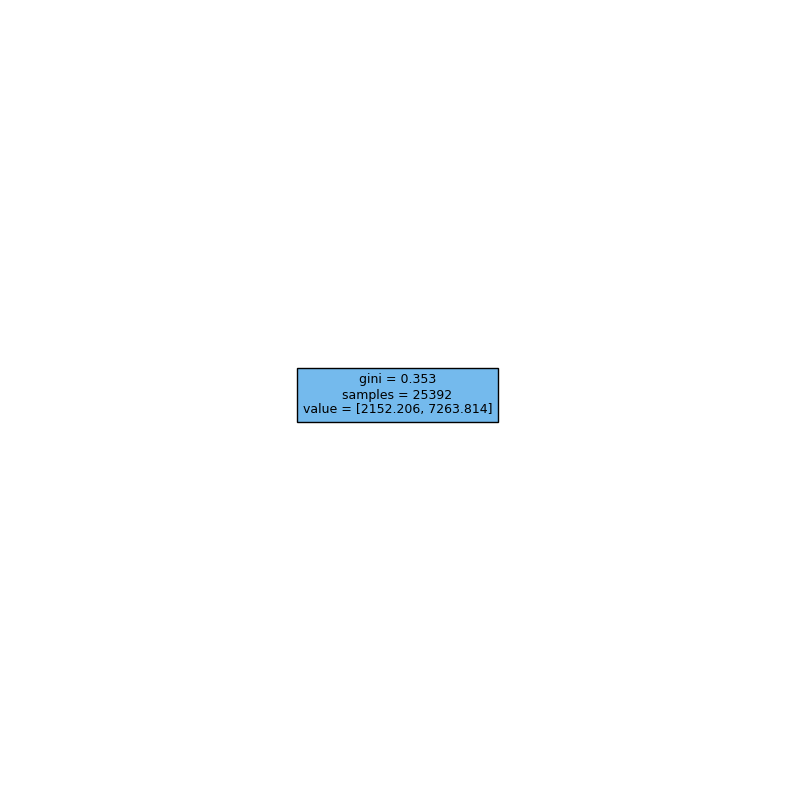

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dt_model_tuned_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_model_tuned_2, feature_names=feature_names, show_weights=True))

|--- weights: [2152.21, 7263.81] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dt_model_tuned_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
no_of_adults                          0.0
no_of_children                        0.0
no_of_weekend_nights                  0.0
no_of_week_nights                     0.0
required_car_parking_space            0.0
lead_time                             0.0
arrival_year                          0.0
arrival_month                         0.0
arrival_date                          0.0
repeated_guest                        0.0
no_of_previous_cancellations          0.0
no_of_previous_bookings_not_canceled  0.0
avg_price_per_room                    0.0
no_of_special_requests                0.0
type_of_meal_plan_Meal Plan 2         0.0
type_of_meal_plan_Meal Plan 3         0.0
type_of_meal_plan_Not Selected        0.0
room_type_reserved_Room_Type 2        0.0
room_type_reserved_Room_Type 3        0.0
room_type_reserved_Room_Type 4        0.0
room_type_reserved_Room_Type 5        0.0
room_type_reserved_Room_Type 6        0.0
room_type_reserved_Room_Type 7    

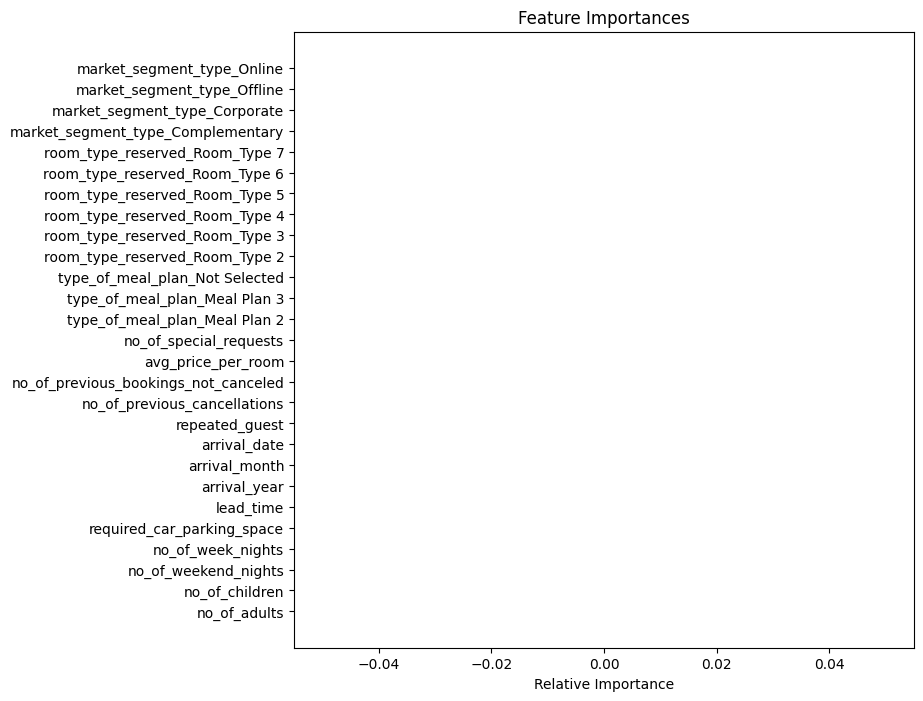

In [ ]:
importances = dt_model_tuned_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Model Performance Comparison and Final Model Selection**

In [ ]:
# Fit a base Decision Tree model
dt_model_base = DecisionTreeClassifier(random_state=42)
dt_model_base.fit(X_train, y_train)

# Calculate training performance for the base Decision Tree
decision_tree_perf_train = model_performance_classification(
    dt_model_base, X_train, y_train
)

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        decision_tree_perf_train.T,
        dt_model_tuned_1_perf_train.T,
        dt_model_tuned_2_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Improved",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Improved,Decision Tree Base,Decision Tree Pre-Pruned,Decision Tree Post-Pruned
Accuracy,0.805135,0.780403,0.994683,0.859444,0.327308
Recall,0.629046,0.777163,0.987246,0.844182,1.000000
Precision,0.737065,0.634292,0.996478,0.755221,0.327308
F1,0.678785,0.698497,0.991840,0.797227,0.493191


In [ ]:
# testing performance comparison
decision_tree_perf_test = model_performance_classification(
    dt_model_base, X_test, y_test
)


models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        decision_tree_perf_test.T,
        dt_model_tuned_1_perf_test.T,
        dt_model_tuned_2_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Decision Tree Base,Decision Tree Pre-Pruned,Decision Tree Post-Pruned
Accuracy,0.679316,0.643297,0.864927,0.854452,0.328402
Recall,0.920257,0.940963,0.793509,0.831841,1.000000
Precision,0.506468,0.478106,0.794843,0.751517,0.328402
F1,0.653357,0.634050,0.794175,0.789641,0.494432
